In [1]:
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## A simple die game

Consider the following game: You toss a fair 6 faced die and you get paid whatever the face value of the die. For instance, if the die comes to be 3 you get paid $3. 

Now, after the first toss you have a choice, either to roll again or stop. If you stop, you take whatever you rolled in the round and leave. If you roll again, you loose whatever you rolled in the round and are bound to the next roll. 


### No cost optimal strategy 
If there is no cost to rolling a round, an optimal strategy is to roll forever until you get a 6. (The expected number of rolls before this happens is 6 anyways.)

#### What if there is a cost to each roll?
Suppose somebody is charging $c(n)$ dollars for the $n^{th}$ roll. For what values of $c(n)$ would you consdier rolling again? 

### Optimal strategy with cost
Optimal strategy of course depends on $c(n)$. For instance, if $c(n)=6$ for every $n$, no sane person would roll even once. 

The fair price of each round is the expected winnings of playing the game for that round. For instance, for the first roll the fair price is $3.5, the expected value of the roll. 

To calculate the fair price of each extra roll we first determine a strategy (in other words, when do we want to roll $n^{th}$ time, assuming that all the $n-1$ rolls have been priced fairly). 

Let us denote the expected payoff of our strategy at the $n^{th}$ roll by $E(n)$. Then, in the end of the $(n-1)^{st}$ turn we would stop if we get a number greater than $E(n-1)$ and go on otherwise. The fair price of the roll would then be $E(n)-E(n-1)$.

For example, since we know that the expectation of one roll is 3.5 (i.e. $E(1)=3.5$), we would stop if we get a 4,5, or 6, and we would go on to roll in case we get 1,2, or 3. In this strategy, the expected payoff of the second round is 

$$E(2)= \frac{1}{6}(4+5+6) + \frac{3.5}{2}=4.25.$$

This tells us the fair price of a second roll would be $E(2)-E(1) = 0.75$. There is nothing stopping us from going further. Suppose we got unlucky and rolled a 3 in the first round (we have paid \$3.5 up front), then went on (paid  \$0.75 extra) and rolled a 4, at this point we can stop and take the loss (of \$0.25) or keep going. It turns out that the expectation of the third round is 
$$E(3)=\frac{4+5+6}{6}+\frac{1}{2}\left(\frac{5+6}{6} + \frac{2}{3}3.5\right)=\frac{55}{12}.$$
Therefore, the fair price for rolling the die a third time is $\frac{55}{12}-\frac{17}{4}=\frac{1}{3}$.


#### A Model
Going a little further, if we take a closer look at how the calculation for $E(n)$ (or the fair price) goes, we see that for large $n$, the only way that the game would stop is if we get a $6$. 

Now consider the simpler game, where we roll the dice and stop if we get a $6$ (and we are paid \$6) and keep rolling otherwise (Note that the fair value of this game is $1$.). If we denote the expected payoff of the $n^{th}$ round by $ f(n) $ we see that $ f(n) $ satisfies

$$\begin{equation} f(n+1) = 1 + \frac{5}{6} f(n-1).\end{equation}$$

Denoting the value of the $n^{th}$ hand by $v(n) = f(n+1) - f(n)$, this equation easily gives

$$ v(n) = \frac{5}{6} v(n-1).$$

Now this recursion clearly has the solution 

$$\begin{equation}v(n) = C \left(\frac{5}{6}\right)^n,\end{equation}$$

for some constant $C$ depending on the initial condition. 

We can also try to give a continuous model for $f(n)$. If we subtract $f(n)$ from both sides of the recursion for $f(n)$ we get

$$f(n+1)- f(n) = 1 -\frac16 f(n).$$

Note that $f(n+1)-f(n)$ is the discrete derivative of $f$. So we can try to model this by

$$f' = 1+ \frac{f}{6}.$$

The solution to this is 

$$f(x) = -6+Ce^{-\frac{x}{6}}$$ 

for some constant $C$ (depending on the initial condition).


#### Relation to die game

Now, if we look at the calculation of the $E(n)$ closely, we see that if we have come to the $7^{th}$ round, the only way we would stop is if we roll a $6$. This gives the following recursion for $E(n)$

$$E(n) = \frac{15}{6}+\frac12\left(\frac{11}{6}+ \frac23\left(\frac{11}{6} + \frac23\left(\cdots +\frac23\left(1+\frac56\left(1+\frac56\left(\cdots+\frac56\left(1+\frac56 3.5\right)\right)\right)\right)\right)\right)\right).$$

Above, the first dots represent the first $6$ trials, and from $7^{th}$ trial onwards we get the same recursive step (stop if rolled $6$ or we are at $n^{th}$ roll, otherwise keep going). 

We see that the inner recursion above is exactly the one we wrote for $f(n)$. We can, then, try to use our continuous model to estimate $E(n)$ and $v(n)$!


#### Computer Calculations
Below we calculate the exact expected value of the $n^{th}$ round, $E(n)$ and the fair price of each round. The function $fair\_value$ calculates $E(n)$ for each $n$ and $fair\_price(n) = E(n)-E(n-1)$ gives the fair price for each additional roll. The function $mth\_toss$ is an auxiliary function that calculates the inner sequence of parentheses in the last equation above.

The discrete fair price, continuous fair price, and continuous value models are denoted by $model\_price\_discrete$, $model\_price\_continuous$, and $model_value_continuous$ respectively.

Finally, we also graph the various models versus the exact values to see how the model is performing.

### Conclusion

From the graphs below it is clear the the continuous model works better than the discrete model. This also gives considerable performance advantages, as one can easily calculate an approximate fair value for the $n^{th}$ roll when $n$ is quite large. The exact fair value starts becoming slow for $n\sim10^6$.




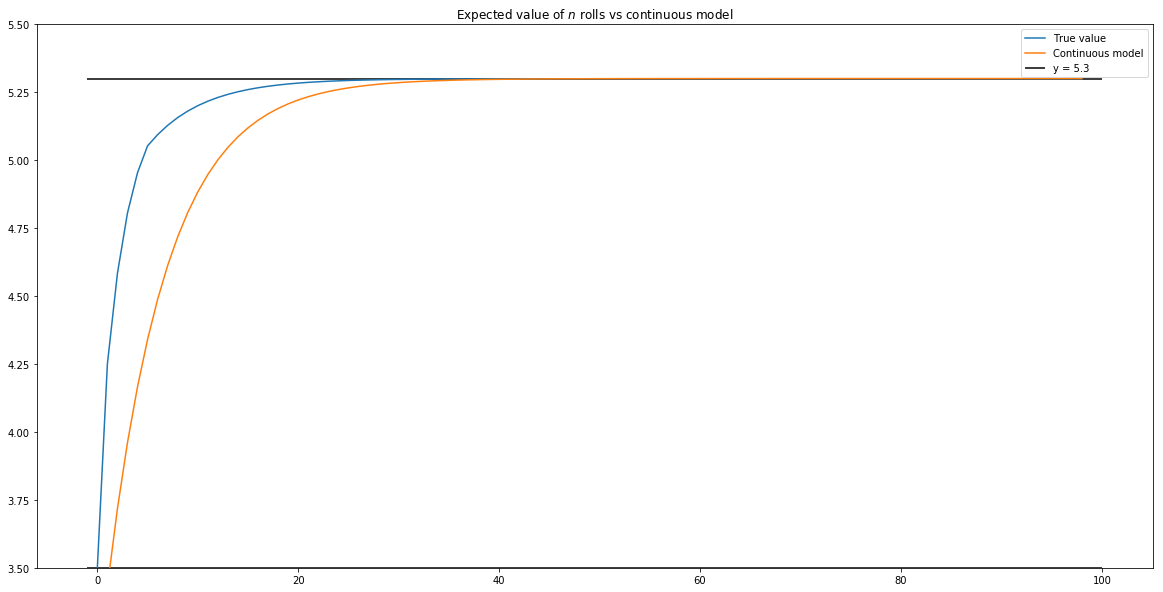

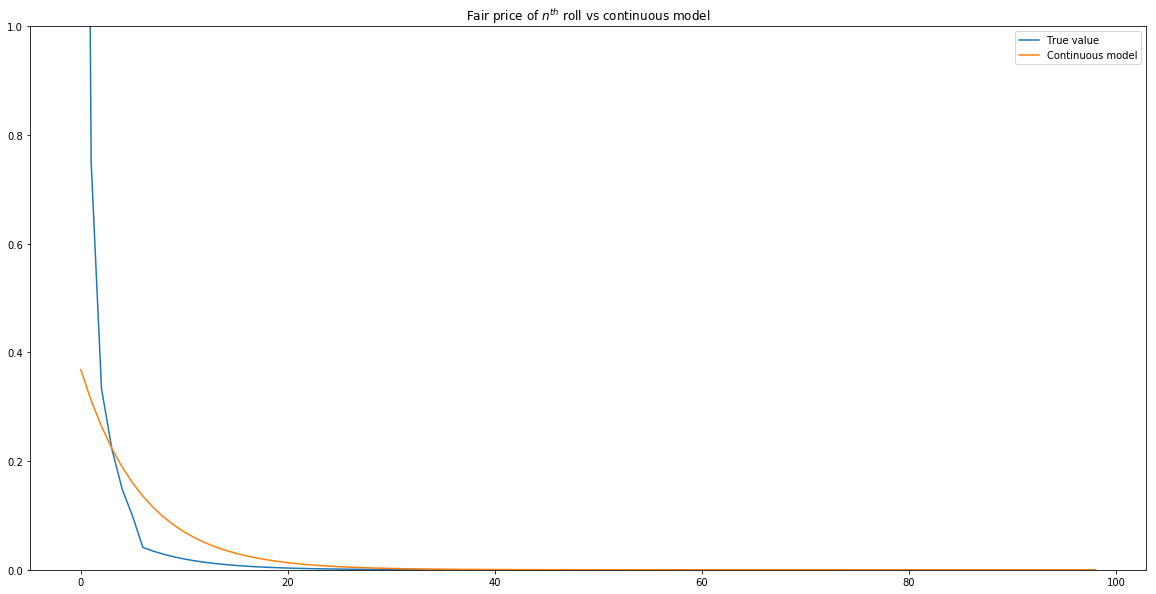

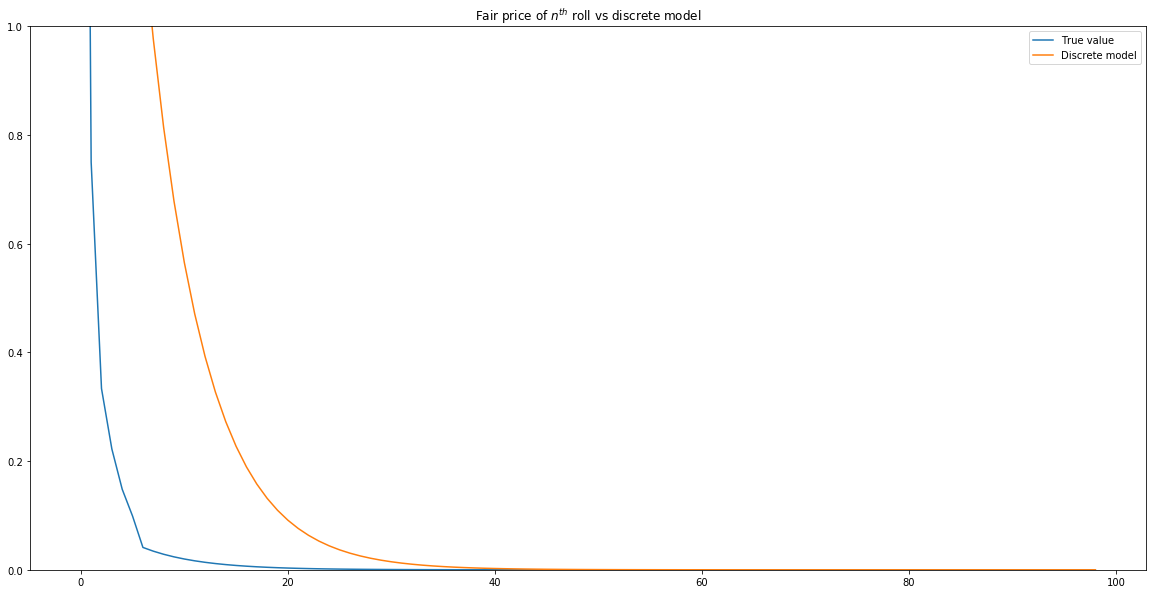

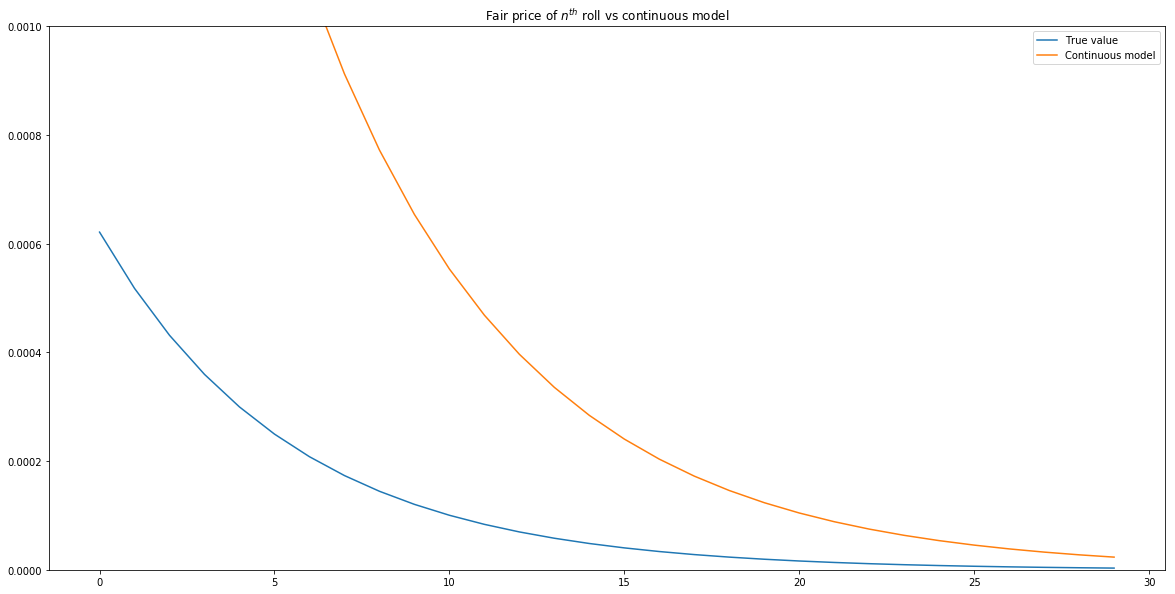

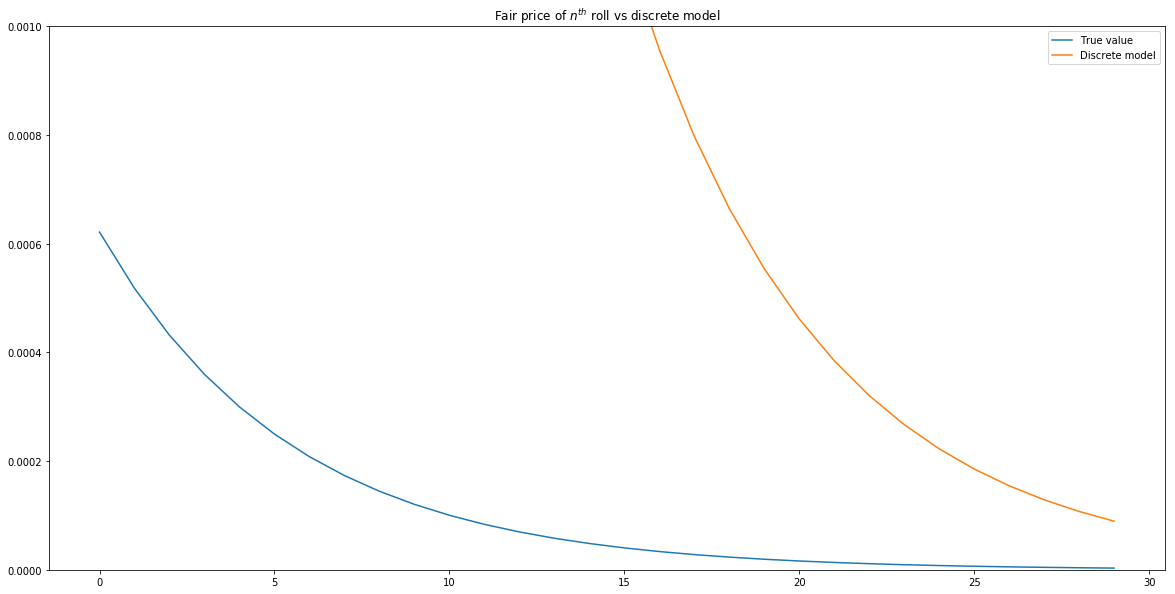

In [5]:

def mth_toss(m):
    a = 3.5
    for i in range(m):
        a = 1 + 5 * a / 6
    return a


def fair_value(n):
    if n == 0:
        return 0
    if n == 1:
        return 3.5
    if n == 2:
        return 4.25
    if n == 3:
        return 55/12
    if n == 4:
        return 173/36
    if n == 5:
        return 535/108
    if n == 6:
        return 1637/324
    else:
        total = 15 /6 + 1 / 2 * (11 / 6 + 2 / 3 * (11 / 6 + 2 / 3 * (11 / 6 + 2 / 3 * (11 / 6 + 2 / 3 * mth_toss(n-6)))))
        return total
    
def fair_price(n):
    return(fair_value(n) - fair_value(n-1))

def model_value_continuous(x):
    return (6 - 2.5 * math.exp((1 - x) / 6)) * 5.3 / 6
def model_price_continuous(x):
    return  2.5 * math.exp((1 - x) / 6) * 5.3 / 36
def model_price_discrete(n):
    return 3.5 * (5 / 6 )**(n - 1)

def show_value_continuous(nTrials_min, nTrials_max, y_min, y_max):
    values = [fair_value(n) for n in range(nTrials_min,nTrials_max)]
    model_values = [model_value_continuous(n) for n in range(nTrials_min,nTrials_max)]
    plt.figure(figsize=(20,10))
    plt.plot(values)
    plt.plot(model_values)
    plt.hlines(3.5,-1,nTrials_max)
    plt.hlines(5.3,-1,nTrials_max)
    plt.ylim(y_min, y_max)
    plt.title('Expected value of $n$ rolls vs continuous model')
    plt.legend(('True value', 'Continuous model', 'y = 5.3'))
    plt.show()

def show_fairprice_continuous(nTrials_min, nTrials_max, y_min, y_max):
    values = [fair_price(n) for n in range(nTrials_min,nTrials_max)]
    model_values = [model_price_continuous(n) for n in range(nTrials_min,nTrials_max)]
    plt.figure(figsize=(20,10))
    plt.plot(values)
    plt.plot(model_values)
    plt.ylim(y_min, y_max)
    plt.title('Fair price of $n^{th}$ roll vs continuous model')
    plt.legend(('True value', 'Continuous model'))
    plt.show() 
    
def show_fairprice_discrete(nTrials_min, nTrials_max, y_min, y_max):
    values = [fair_price(n) for n in range(nTrials_min,nTrials_max)]
    model_values = [model_price_discrete(n) for n in range(nTrials_min,nTrials_max)]
    plt.figure(figsize=(20,10))
    plt.plot(values)
    plt.plot(model_values)
    plt.ylim(y_min,y_max)
    plt.title('Fair price of $n^{th}$ roll vs discrete model')
    plt.legend(('True value', 'Discrete model'))
    plt.show() 

show_value_continuous(1,100, 3.5, 5.5)

show_fairprice_continuous(1, 100, 0,1)

show_fairprice_discrete(1,100, 0,1)

show_fairprice_continuous(30,60, 0,0.001)
show_fairprice_discrete(30,60, 0,0.001)

